# HW 4 - Assignment 1

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv(os.getenv('PUI2015')+"/PUI2015_MMajumdar/HW4/201504-citibike-tripdata.csv")
#df=pd.read_csv ("Documents/PUI2015/PUI2015_MMajumdar/HW4/201504-citibike-tripdata.csv")
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [3]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
print df['ageM'].describe()
print df['ageF'].describe()

count    457582.000000
mean         39.305307
std          11.667738
min          16.000000
25%          30.000000
50%          37.000000
75%          47.000000
max         116.000000
Name: ageM, dtype: float64
count    128432.00000
mean         37.73537
std          11.29918
min          17.00000
25%          29.00000
50%          35.00000
75%          46.00000
max         115.00000
Name: ageF, dtype: float64


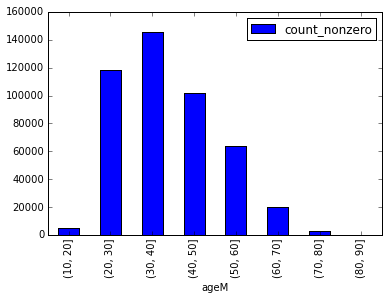

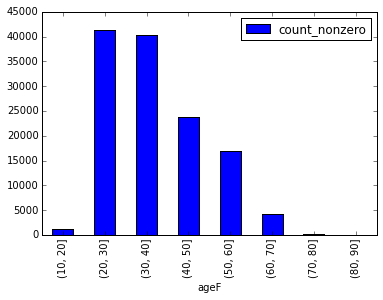

In [4]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001449
(20, 30]       0.061914
(30, 40]       0.058789
(40, 50]       0.020863
(50, 60]       0.014038
(60, 70]       0.003639
(70, 80]       0.000023
(80, 90]       0.000000


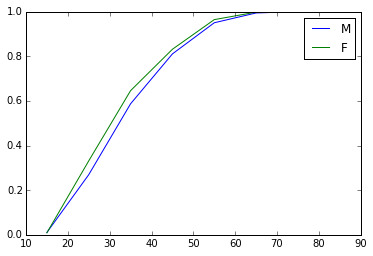

In [5]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [6]:
import scipy.stats

## KS tests for correlation

In [7]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)

print ks

(0.50452949922592316, 0.0)


In [8]:
#computing critical value
n1 = 457582.000000
n2 = 128432.00000

criticalValue = 1.36 * sqrt((n1+n2)/(n1*n2))
print criticalValue

0.00429459105529


#### Since Observed value of KS test (0.50452949922592316) is greater than reference value (0.00429459105529), we can reject the null hypothesis. Hence, we understand that Age of Males and Age of Females is not correlated.

## Pearson's  test for correlation

In [9]:
import random

random.seed(200)

x = random.sample(df.ageM[~np.isnan(df.ageM)],10000)
y = random.sample(df.ageF[~np.isnan(df.ageF)],10000)

pearsons=scipy.stats.pearsonr(x,y)

In [10]:
print pearsons

(0.012772136943576548, 0.20156478481749696)


#### Pearson's test value = 0.012772136943576548. Hence, very little correlation is ibserved between ageM and ageF

## Spearman's  test for correlation

In [11]:
spearman = scipy.stats.spearmanr(x,y,axis=0)
print spearman

(0.010482064208110186, 0.29459061140050147)


#### Spearman's test value = 0.010482064208110186. Hence, very little correlation is ibserved between ageM and ageF

## DO THE SAME FOR THE DISTRIBUTION OF RIDERS DURING THE DAY VS DURING THE NIGHT!

In [12]:
df['timeDetails'] = pd.to_datetime(df['starttime'])

In [13]:
#print df.info()
df['startTimeHour'] = df['timeDetails'].dt.hour
df['timeDay'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['startTimeHour']<18)]
df['timeNight'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['startTimeHour']>18)]

print df['timeDay'].describe()
print df['timeNight'].describe()

count    424520.000000
mean         39.703616
std          11.768736
min          16.000000
25%          30.000000
50%          38.000000
75%          48.000000
max         130.000000
Name: timeDay, dtype: float64
count    102355.000000
mean         36.451956
std          10.951986
min          16.000000
25%          28.000000
50%          33.000000
75%          43.000000
max         130.000000
Name: timeNight, dtype: float64


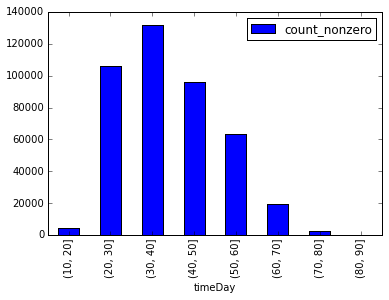

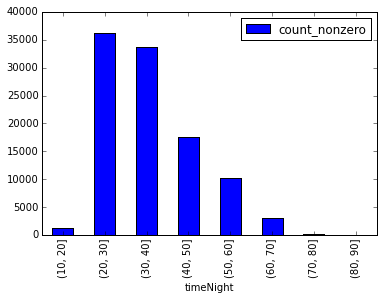

In [14]:
bins = np.arange(10, 99, 10)
df.timeDay.groupby(pd.cut(df.timeDay, bins)).agg([count_nonzero]).plot(kind='bar')
df.timeNight.groupby(pd.cut(df.timeNight, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
timeDay                
(10, 20]       0.001711
(20, 30]       0.105359
(30, 40]       0.124622
(40, 50]       0.070381
(50, 60]       0.019547
(60, 70]       0.003318
(70, 80]       0.000036
(80, 90]       0.000000


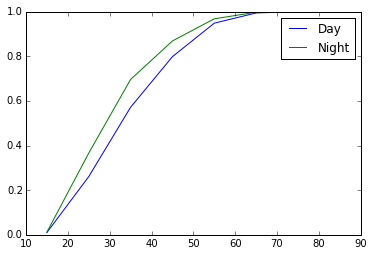

In [15]:
csD=df.timeDay.groupby(pd.cut(df.timeDay, bins)).agg([count_nonzero]).cumsum()

csN=df.timeNight.groupby(pd.cut(df.timeNight, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.legend()

In [16]:
ks=scipy.stats.ks_2samp(df.timeDay, df.timeNight)

print ks

(0.49382271340762429, 0.0)


In [17]:
#computing critical value
n1 = 424520.000000
n2 = 102355.00000

criticalValue = 1.36 * sqrt((n1+n2)/(n1*n2))
print criticalValue

0.00473575356933


#### Since Observed value of KS test (0.49382271340762429) is greater than reference value (0.00473575356933), we can reject the null hypothesis. Hence, we understand that timeDay and timeNight is not correlated.

## Pearson's  test for correlation

In [18]:
import random

random.seed(200)

x = random.sample(df.timeDay[~np.isnan(df.timeDay)],10000)
y = random.sample(df.timeNight[~np.isnan(df.timeNight)],10000)

pearsons=scipy.stats.pearsonr(x,y)

print pearsons

(0.0054308035699260635, 0.58711846124197797)


#### Pearson's test value = 0.0054308035699260635. Hence, very little correlation is ibserved between timeDay and timeNight

## Spearman's  test for correlation

In [19]:
spearman = scipy.stats.spearmanr(x,y,axis=0)
print spearman

(0.0010086155619420619, 0.91967034981033424)


#### Spearman's test value = 0.0010086155619420619. Hence, very little correlation is ibserved between timeDay and timeNight